<a href="https://colab.research.google.com/github/sidusit/MTech-Dissertation/blob/main/EDA_DataPreprocess_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing

##Data Loading

In [ ]:
TCS = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Database/Indian/historical_stock_price_v2_TCS.csv")
HDFC = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Database/Indian/historical_stock_price_v2_HDFC.csv")
HUL = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Database/Indian/historical_stock_price_v2_HUL.csv")
MARUTI = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Database/Indian/historical_stock_price_v2_MARUTI.csv")

##Apple

In [ ]:
TCS.head(), HDFC.head(), HUL.head(), MARUTI.head()

(   ticker        date     open     high     low    close  adj close   volume
 0  TCS.NS  2021-10-29  3400.05  3453.75  3395.5  3434.40    3434.40  1390025
 1  TCS.NS  2021-10-28  3518.00  3518.00  3415.0  3421.65    3421.65  2423261
 2  TCS.NS  2021-10-27  3483.00  3511.25  3483.0  3489.75    3489.75  2509919
 3  TCS.NS  2021-10-26  3494.50  3529.00  3475.0  3482.60    3482.60  3877980
 4  TCS.NS  2021-10-25  3503.00  3514.55  3450.0  3492.95    3492.95  2594211,
     ticker        date     open    high      low    close  adj close   volume
 0  HDFC.NS  2021-10-29  2891.00  2893.0  2791.20  2844.70    2844.70  3829786
 1  HDFC.NS  2021-10-28  2891.00  2924.3  2863.15  2900.80    2900.80  3302501
 2  HDFC.NS  2021-10-27  2920.05  2948.0  2901.40  2915.00    2915.00  3136162
 3  HDFC.NS  2021-10-26  2908.00  2934.0  2896.00  2911.65    2911.65  2429951
 4  HDFC.NS  2021-10-25  2905.00  2919.0  2856.25  2896.15    2896.15  3463033,
           ticker        date    open  ...    close  adj

In [ ]:
TCS.info(), HDFC.info(), HUL.info(), MARUTI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     697 non-null    object 
 1   date       697 non-null    object 
 2   open       697 non-null    float64
 3   high       697 non-null    float64
 4   low        697 non-null    float64
 5   close      697 non-null    float64
 6   adj close  697 non-null    float64
 7   volume     697 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 43.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     697 non-null    object 
 1   date       697 non-null    object 
 2   open       697 non-null    float64
 3   high       697 non-null    float64
 4   low        697 non-null    float64
 5   close      697 non-null    float64
 6   adj 

(None, None, None, None)

In [ ]:
# Drop NULL rows
TCS.dropna(inplace = True)
HUL.dropna(inplace = True)
HDFC.dropna(inplace = True)
MARUTI.dropna(inplace = True)

In [ ]:
# Change Dtype of Columns
TCS["date"] = pd.to_datetime(TCS["date"])
TCS = TCS.astype({"open": float, "volume": float})

HDFC["date"] = pd.to_datetime(HDFC["date"])
HDFC = HDFC.astype({"open": float, "volume": float})

HUL["date"] = pd.to_datetime(HUL["date"])
HUL = HUL.astype({"open": float, "volume": float})

MARUTI["date"] = pd.to_datetime(MARUTI["date"])
MARUTI = MARUTI.astype({"open": float, "volume": float})

In [ ]:
# Sort the Database by Date
TCS = TCS.sort_values(by = 'date', ignore_index = True)
HDFC = HDFC.sort_values(by = 'date', ignore_index = True)
HUL = HUL.sort_values(by = 'date', ignore_index = True)
MARUTI = MARUTI.sort_values(by = 'date', ignore_index = True)

In [ ]:
TCS.describe(), HDFC.describe(), HUL.describe(), MARUTI.describe()

(              open         high  ...    adj close        volume
 count   697.000000   697.000000  ...   697.000000  6.970000e+02
 mean   2515.400789  2543.268580  ...  2458.983902  1.951051e+07
 std     575.609598   578.509491  ...   603.127480  1.610797e+08
 min    1559.700000  1685.450000  ...  1603.450000  4.138610e+05
 25%    2080.000000  2098.000000  ...  2000.240000  2.127681e+06
 50%    2237.000000  2255.000000  ...  2145.540000  2.826425e+06
 75%    3083.000000  3117.000000  ...  3044.400000  3.838059e+06
 max    3925.000000  3989.900000  ...  3946.980000  1.617876e+09
 
 [8 rows x 6 columns],
               open         high  ...    adj close        volume
 count   697.000000   697.000000  ...   697.000000  6.970000e+02
 mean   2207.920445  2235.147776  ...  2161.436284  2.329538e+09
 std     339.139009   337.736246  ...   355.916634  6.127134e+10
 min    1476.000000  1568.150000  ...  1453.540000  7.281410e+05
 25%    1945.000000  1970.000000  ...  1865.540000  2.487332e+06


#Exploratory Data Analysis

In [ ]:
TCS['adj close'].tail(1), HDFC['adj close'].tail(1), HUL['adj close'].tail(1), MARUTI['adj close'].tail(1)

(696    3434.4
 Name: adj close, dtype: float64, 696    2844.7
 Name: adj close, dtype: float64, 696    2383.6
 Name: adj close, dtype: float64, 696    7466.3
 Name: adj close, dtype: float64)

In [ ]:
Companies = [TCS, HDFC, HUL, MARUTI]
Companies_Title = ["TCS","HDFC","HUL","MARUTI"]

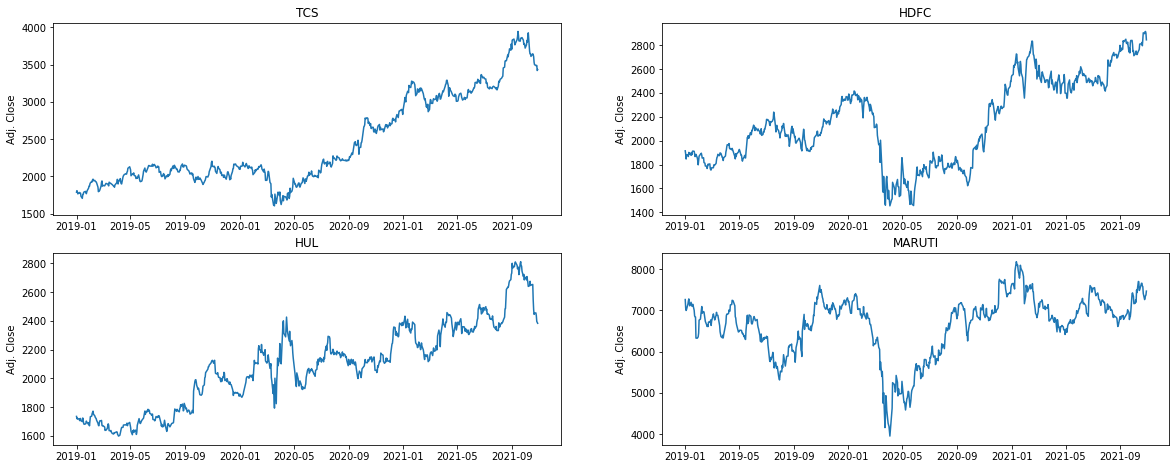

In [ ]:
# Lets view historical view of the closing prices
plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["date"], company["adj close"])
  plt.title(Companies_Title[index])
  plt.ylabel('Adj. Close')

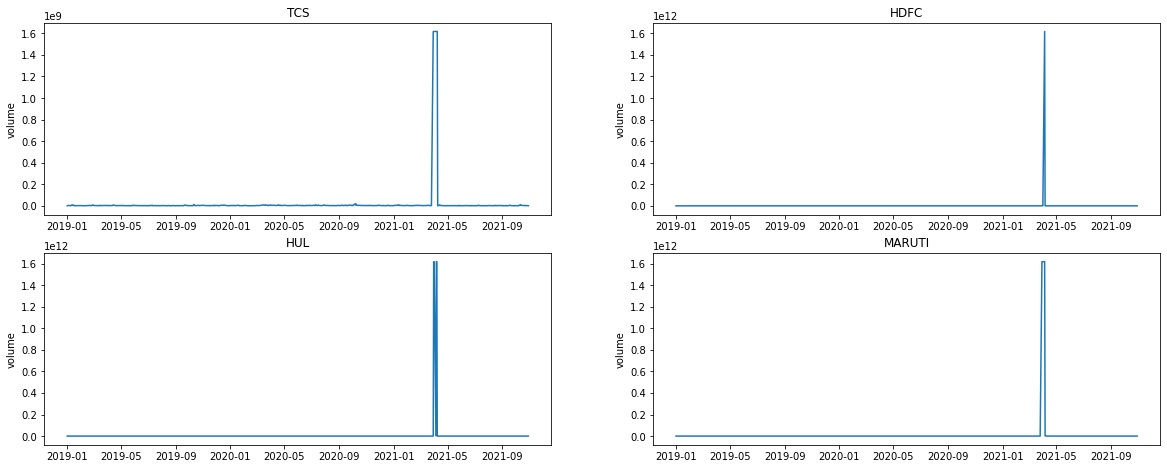

In [ ]:
# Now lets plot the total volume of stock being traded each day 
plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["date"], company["volume"])
  plt.title(Companies_Title[index])
  plt.ylabel('volume')

Now, we have seen the visualizations for the closing price and volume traded each day, let's go ahead and calculate the moving average of the stock.

### What was the moving average of the various stocks ?

In [ ]:
Moving_Average_Day = [10, 20, 50]
for Moving_Average in Moving_Average_Day:
  for company in Companies:
    column_name = f'Moving Average for {Moving_Average} days'
    company[column_name] = company["adj close"].rolling(Moving_Average).mean()

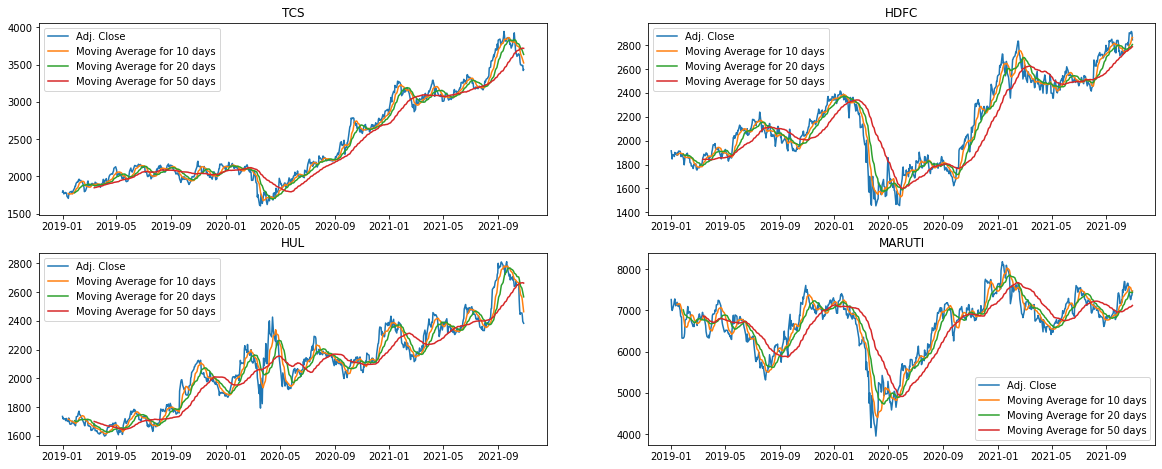

In [ ]:
plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["date"], company["adj close"])
  plt.plot(company["date"], company["Moving Average for 10 days"])
  plt.plot(company["date"], company["Moving Average for 20 days"])
  plt.plot(company["date"], company["Moving Average for 50 days"])
  plt.title(Companies_Title[index])
  plt.legend(("Adj. Close", "Moving Average for 10 days", "Moving Average for 20 days", "Moving Average for 50 days"))

### What was the daily return of the stock on average ?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

In [ ]:
# pct_change() function calculates the percentage change between the current and a prior element.
# This function by default calculates the percentage change from the immediately previous row. 
for company in Companies:
  company["Daily Return"] = company["adj close"].pct_change()

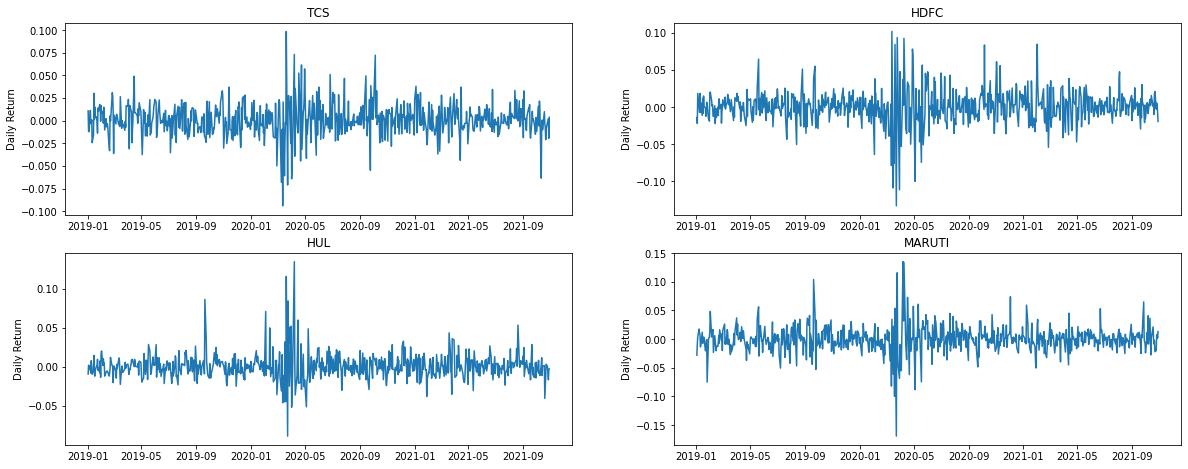

In [ ]:
plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["date"], company["Daily Return"])
  plt.title(Companies_Title[index])
  plt.ylabel('Daily Return')

Now, let's get an overall at the average daily return using a histogram.

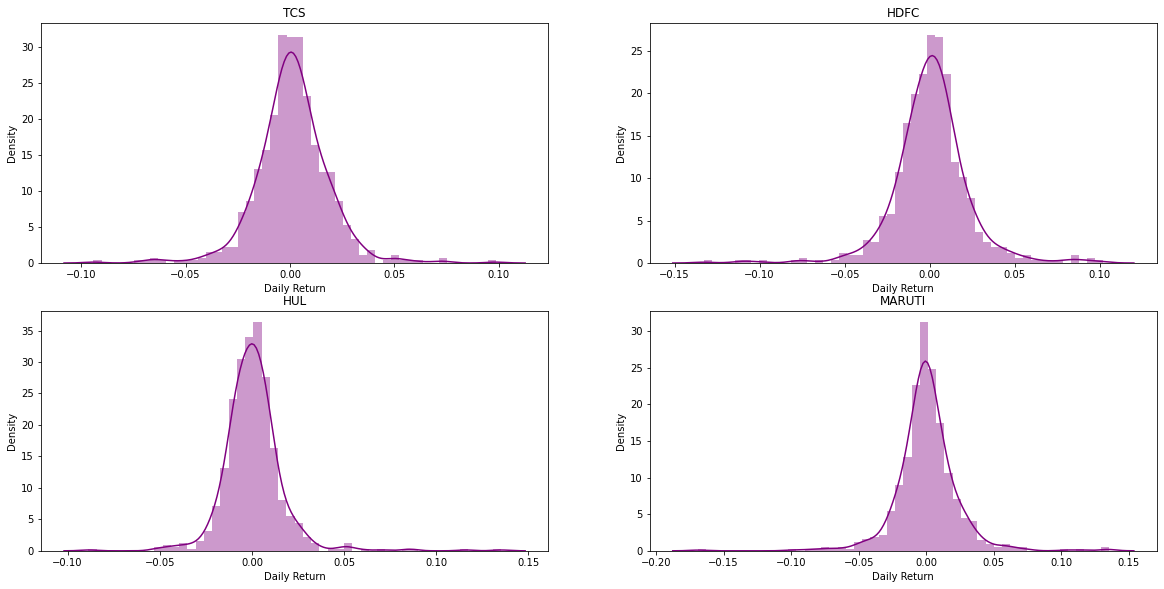

In [ ]:
# distplot is a deprecated function, so to ignore warnings, the filterwarnings function is used.
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20, 15))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  sns.distplot(company["Daily Return"].dropna(), color = "purple")
  plt.title(Companies_Title[index])

Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words kurtosis identifies whether the tails of a given distribution contain extreme values.

In [ ]:
print("Kurtosis Value")
for index, company in enumerate(Companies):
  print(f'{Companies_Title[index]}: {company["Daily Return"].kurtosis()}')

Kurtosis Value
TCS: 4.606939097631171
HDFC: 6.189191071931482
HUL: 13.80131880548373
MARUTI: 9.984329363446168


The above graph and the positive kurtosis value indicate that getting extreme daily return values is rare.

In [ ]:
TCS.to_csv('/content/drive/MyDrive/Colab Notebooks/Database/Indian/TCS_PreProcessed.csv',index=False)
HDFC.to_csv('/content/drive/MyDrive/Colab Notebooks/Database/Indian/HDFC_PreProcessed.csv',index=False)
HUL.to_csv('/content/drive/MyDrive/Colab Notebooks/Database/Indian/HUL_PreProcessed.csv',index=False)
MARUTI.to_csv('/content/drive/MyDrive/Colab Notebooks/Database/Indian/MARUTI_PreProcessed.csv',index=False)